In [16]:
jsons_folder = "C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_off"
renders_folder = r"C:\Stuff\Results\renders\renders_nerfacto_stump_opt_off"

for file in os.listdir(jsons_folder):
    file_path = os.path.join(jsons_folder, file)
    timestamp = get_timestamp(file_path)
    render_folder = os.path.join(renders_folder, timestamp)
    render_path = os.path.join(render_folder, timestamp)
    # print(render_path)
    if not os.path.exists(render_folder):
        print(file, timestamp)
        

In [18]:
jsons_folder = "C:\Stuff\Results\jsons\jsons_ngp_lego_opt_off"
renders_folder = r"C:\Stuff\Results\renders\renders_ngp_lego_opt_off"

for file in os.listdir(jsons_folder):
    file_path = os.path.join(jsons_folder, file)
    timestamp = get_timestamp(file_path)
    render_folder = os.path.join(renders_folder, timestamp)
    render_path = os.path.join(render_folder, timestamp)
    # print(render_path)
    if not os.path.exists(render_folder):
        print(file, timestamp)
        

In [20]:
jsons_folder = "C:\Stuff\Results\jsons\jsons_ngp_lego_opt_on"
renders_folder = r"C:\Stuff\Results\renders\renders_ngp_lego_opt_on"

for file in os.listdir(jsons_folder):
    file_path = os.path.join(jsons_folder, file)
    timestamp = get_timestamp(file_path)
    render_folder = os.path.join(renders_folder, timestamp)
    render_path = os.path.join(render_folder, timestamp)
    # print(render_path)
    if not os.path.exists(render_folder):
        print(file, timestamp)
        

In [14]:
jsons_folder = "C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_on"
renders_folder = r"C:\Stuff\Results\renders\renders_nerfacto_stump_opt_on"
# renders_folder = r"C:\Stuff\Dataset-creation\renders\renders_nerfacto_and_beyond"

for file in os.listdir(jsons_folder):
    file_path = os.path.join(jsons_folder, file)
    timestamp = get_timestamp(file_path)
    render_folder = os.path.join(renders_folder, timestamp)
    render_path = os.path.join(render_folder, timestamp)
    # print(render_path)
    if not os.path.exists(render_folder):
        print(file, timestamp)
        

In [15]:
import os
for folder in os.listdir('C:\Stuff\Results\jsons'):
    path_folder = os.path.join('C:\Stuff\Results\jsons', folder)
    print(path_folder, len(os.listdir(path_folder)))

C:\Stuff\Results\jsons\jsons_nerfacto_lego_opt_off 110
C:\Stuff\Results\jsons\jsons_nerfacto_lego_opt_on 110
C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_off 110
C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_on 110
C:\Stuff\Results\jsons\jsons_ngp_lego_opt_off 110
C:\Stuff\Results\jsons\jsons_ngp_lego_opt_on 110
C:\Stuff\Results\jsons\jsons_ngp_stump_opt_off 110
C:\Stuff\Results\jsons\jsons_ngp_stump_opt_on 110


In [1]:
import os
for folder in os.listdir('C:\Stuff\Results\jsons'):
    path_folder = os.path.join('C:\Stuff\Results\jsons', folder)
    print(path_folder, len(os.listdir(path_folder)))

C:\Stuff\Results\jsons\jsons_nerfacto_lego_opt_off 110
C:\Stuff\Results\jsons\jsons_nerfacto_lego_opt_on 110
C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_off 110
C:\Stuff\Results\jsons\jsons_nerfacto_stump_opt_on 110
C:\Stuff\Results\jsons\jsons_ngp_lego_opt_off 63
C:\Stuff\Results\jsons\jsons_ngp_lego_opt_on 63
C:\Stuff\Results\jsons\jsons_ngp_stump_opt_off 110
C:\Stuff\Results\jsons\jsons_ngp_stump_opt_on 110


In [4]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor

psnr_metric = PeakSignalNoiseRatio(data_range=1.0)
lpips_metric = LearnedPerceptualImagePatchSimilarity()
ssim_metric = structural_similarity_index_measure

ORIGINAL_IMAGES_PATH = r'C:\Stuff\Results\renders\lego_original_images'
RENDERS_PATH = r"C:\Stuff\Results\renders"

def get_timestamp(path):
    f = open(path)
    data =  json.load(f)
    ckpt_path = data['checkpoint']
    pattern = r'\d{4}-\d{2}-\d{2}_\d{6}'
    match = re.search(pattern, ckpt_path)
    timestamp = match.group()
    return timestamp

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return ToTensor()(image)


In [16]:
psnrs, lpips_vals, ssims = [], [], []

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return ToTensor()(image)


all_runs_metrics = {}

jsons_folder = "C:\Stuff\Results\jsons\jsons_ngp_lego_opt_off"
renders_folder = r"C:\Stuff\Results\renders\renders_ngp_lego_opt_off"
PATH_ORIGINAL_IMAGES = r"C:\Stuff\Results\renders\lego_original_images"

for filename in os.listdir(jsons_folder):
    if filename.endswith(".json"):
        json_filename = filename
        json_path = os.path.join(jsons_folder, filename)
        timestamp = get_timestamp(json_path)

        run_path = os.path.join(renders_folder, timestamp)
        print(run_path)
        if os.path.isdir(run_path):
            psnrs, lpips_vals, ssims = [], [], []

            for filename in os.listdir(run_path):
                if filename.endswith('img.jpg') and not filename.startswith('crop_degrated_'):
                    base_name = filename.split('-')[0]
                    degraded_filename = f'crop_degrated_{base_name}-img.jpg'
                    degraded_filepath = os.path.join(run_path, degraded_filename)

                    degraded_image = load_image(degraded_filepath)
                    original_image = load_image(os.path.join(PATH_ORIGINAL_IMAGES, base_name + '-img.jpg'))

                    original_image = original_image.unsqueeze(0)  # Add batch dimension
                    degraded_image = degraded_image.unsqueeze(0)  # Add batch dimension

                    psnr = psnr_metric(original_image, degraded_image)
                    ssim = ssim_metric(original_image, degraded_image)
                    lpips = lpips_metric(original_image, degraded_image)
                    psnrs.append(psnr.item())
                    ssims.append(ssim.item())
                    lpips_vals.append(lpips.item()) 
            # print(run_path)
            metrics = {
                'run': timestamp,
                'PSNR': psnrs,
                'SSIM': ssims,
                'LPIPS': lpips_vals
            }
            all_runs_metrics[json_filename[:-5]] = metrics
            
for run_metrics in all_runs_metrics:
    print(f"Metrics for run {run_metrics['run']}:")
    print(f"Name {run_metrics['name']}:")
    print("PSNR values:", run_metrics['PSNR'])
    print("SSIM values:", run_metrics['SSIM'])
    print("LPIPS values:", run_metrics['LPIPS'])
    print("\n")

C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-19_160400


c:\Users\danko\miniconda3\envs\nerfstudio\lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_015238
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_020008
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_020732
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_021500
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_022231
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_023005
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_023744
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_024527
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_025318
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_030124
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_030918
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_031747
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_032601
C:\Stuff\Results\renders\renders_ngp_lego_opt_off\2024-03-04_033430
C:\Stuff\Results\renders\renders_ngp_lego_opt_of

TypeError: string indices must be integers

In [35]:
len(all_runs_metrics)

63

In [ ]:
import numpy as np
import os

# Create the 'metrics' folder if it doesn't exist
folder_path = 'metrics'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the all_runs_metrics variable as an npy file
file_path = os.path.join(folder_path, 'stump_ngp_lego_opt_off_metrics.npy')
np.save(file_path, all_runs_metrics)


In [26]:
psnrs, lpips_vals, ssims = [], [], []

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return ToTensor()(image)


all_runs_metrics_v2 = {}

jsons_folder = "C:\Stuff\Results\jsons\jsons_ngp_stump_opt_on"
renders_folder = r"C:\Stuff\Results\renders\renders_stump_ngp_opt_on"
PATH_ORIGINAL_IMAGES = r"C:\Stuff\Results\renders\stump_original_images"

for filename in os.listdir(jsons_folder):
    if filename.endswith(".json"):
        json_filename = filename
        json_path = os.path.join(jsons_folder, filename)
        timestamp = get_timestamp(json_path)

        run_path = os.path.join(renders_folder, timestamp)
        print(run_path)
        if os.path.isdir(run_path):
            psnrs, lpips_vals, ssims = [], [], []

            for filename in os.listdir(run_path):
                if filename.endswith('img.jpg') and not filename.startswith('crop_degrated_'):
                    base_name = filename.split('-')[0]
                    degraded_filename = f'crop_degrated_{base_name}-img.jpg'
                    degraded_filepath = os.path.join(run_path, degraded_filename)

                    degraded_image = load_image(degraded_filepath)
                    original_image = load_image(os.path.join(PATH_ORIGINAL_IMAGES, base_name + '-img.jpg'))

                    original_image = original_image.unsqueeze(0)  # Add batch dimension
                    degraded_image = degraded_image.unsqueeze(0)  # Add batch dimension

                    psnr = psnr_metric(original_image, degraded_image)
                    ssim = ssim_metric(original_image, degraded_image)
                    lpips = lpips_metric(original_image, degraded_image)
                    psnrs.append(psnr.item())
                    ssims.append(ssim.item())
                    lpips_vals.append(lpips.item()) 
            # print(run_path)
            metrics = {
                'run': timestamp,
                'PSNR': psnrs,
                'SSIM': ssims,
                'LPIPS': lpips_vals
            }
            all_runs_metrics_v2[json_filename[:-5]] = metrics
            
for run_metrics in all_runs_metrics_v2:
    print(f"Metrics for run {run_metrics['run']}:")
    print(f"Name {run_metrics['name']}:")
    print("PSNR values:", run_metrics['PSNR'])
    print("SSIM values:", run_metrics['SSIM'])
    print("LPIPS values:", run_metrics['LPIPS'])
    print("\n")

C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-03-19_162308
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-03-17_122805
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_145958
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_150917
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_151827
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_152726
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_153622
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_154521
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_133618
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_134545
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_135507
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_140422
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_141334
C:\Stuff\Results\renders\renders_stump_ngp_opt_on\2024-02-29_142235
C:\Stuff\Results\renders\renders_stump_ngp_opt_o

TypeError: string indices must be integers

In [27]:
import numpy as np
import os

# Create the 'metrics' folder if it doesn't exist
folder_path = 'metrics'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the all_runs_metrics variable as an npy file
file_path = os.path.join(folder_path, 'stump_ngp_opt_on_metrics.npy')
np.save(file_path, all_runs_metrics_v2)


In [28]:
import matplotlib.pyplot as plt

In [39]:
types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict = {type: {} for type in types}

for k,v in all_runs_metrics.items():
    for type in types:
        if type in k:
            types_dict[type][k] = v

In [61]:
# for type, metrics in types_dict.items():
#     print(f"Type: {type}")
#     psnrs = [np.mean(v['PSNR']) for k,v in metrics.items()]
#     ssims = [np.mean(v['SSIM']) for k,v in metrics.items()]
#     lpips = [np.mean(v['LPIPS']) for k,v in metrics.items()]
#     print(f"PSNR: {np.mean(psnrs)}")
#     print(f"SSIM: {np.mean(ssims)}")
#     print(f"LPIPS: {np.mean(lpips)}")
#     print("\n")

In [99]:
# import os
# save_dir = r'C:\Stuff\Results\plots\stump_ngp_opt_off'
# config_name = os.path.basename(save_dir)

# for type, metrics in types_dict.items():
#     psnrs = [v['PSNR'] for k,v in metrics.items()]
#     ssims = [v['SSIM'] for k,v in metrics.items()]
#     lpips = [v['LPIPS'] for k,v in metrics.items()]
#     names = [k for k,v in metrics.items()]     
    
#     if len(names) > 1:
#         sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
#         sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
#         sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
#         sorted_ssims = [ssims[names.index(name)] for name in sorted_names]

#         exp_name = [name.split('-')[:] for name in sorted_names]
#         exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
#         print(exp_name_joined)
#         sorted_names = [name.split('-')[-1] for name in sorted_names]
#     else:
#         sorted_names = names
#         sorted_names = [name.split('-')[-1] for name in sorted_names]
#         sorted_psnrs = psnrs
#         sorted_lpips = lpips
#         sorted_ssims = ssims

#         exp_name_joined = 'benchmark'
    
#     plt.figure(figsize=(10, 6))
#     box = plt.boxplot(sorted_psnrs, labels=sorted_names, patch_artist=True)  # Enable patch artist
#     for patch in box['boxes']:  # Change color of each box
#         patch.set_facecolor('lightblue')
#     plt.ylim(0, 28)  # Set y-axis limits
#     plt.ylabel('PSNR')
#     plt.savefig(os.path.join(save_dir, f'{config_name}_PSNR_{exp_name_joined}.png'))

#     plt.figure(figsize=(10, 6))
#     box = plt.boxplot(sorted_lpips, labels=sorted_names, patch_artist=True)  # Enable patch artist
#     for patch in box['boxes']:  # Change color of each box
#         patch.set_facecolor('lightblue')
#     plt.ylim(0, 1)  # Set y-axis limits
#     plt.ylabel('LPIPS')
#     plt.savefig(os.path.join(save_dir, f'{config_name}_LPIPS_{exp_name_joined}.png'))

#     plt.figure(figsize=(10, 6))
#     box = plt.boxplot(sorted_ssims, labels=sorted_names, patch_artist=True)  # Enable patch artist
#     for patch in box['boxes']:  # Change color of each box
#         patch.set_facecolor('lightblue')
#     plt.ylim(0, 1)  # Set y-axis limits
#     plt.ylabel('SSIM')
#     plt.savefig(os.path.join(save_dir, f'{config_name}_SSIM_{exp_name_joined}.png'))    
    

stump-every
stump-gamma
stump-noise-std
stump-orientation-std
stump-pns-blue-noise-percent
stump-pns-green-noise-percent


C:\Users\danko\AppData\Local\Temp\ipykernel_18256\835463253.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


stump-pns-red-noise-percent
stump-pos-orient-std
stump-position-std
stump-range
stump-saturation-std


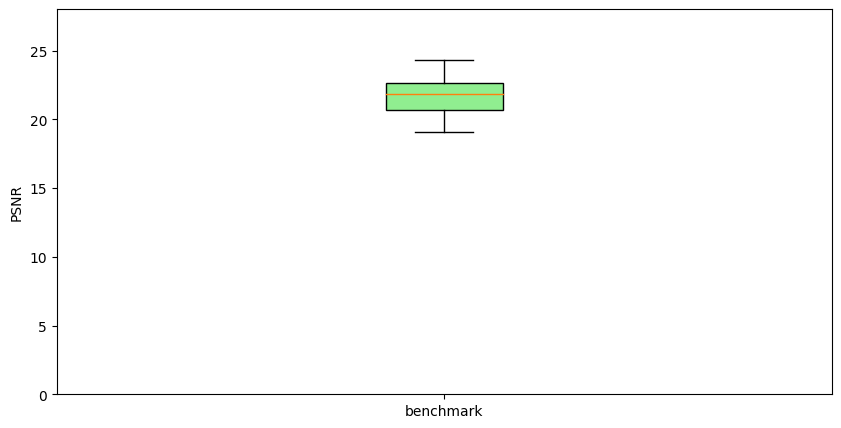

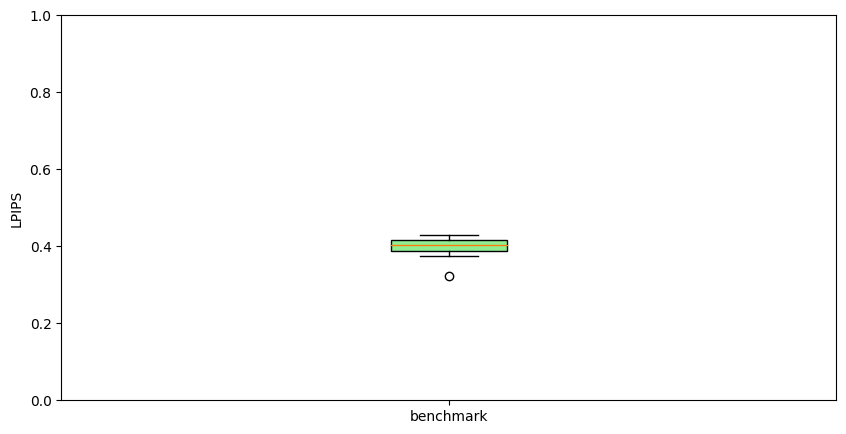

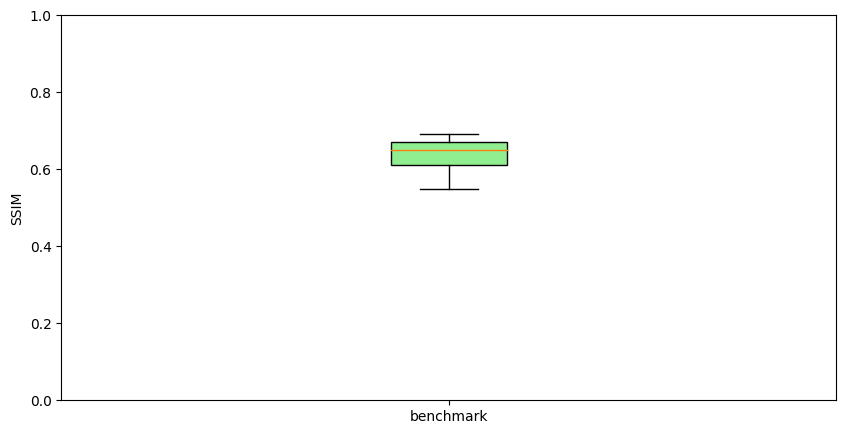

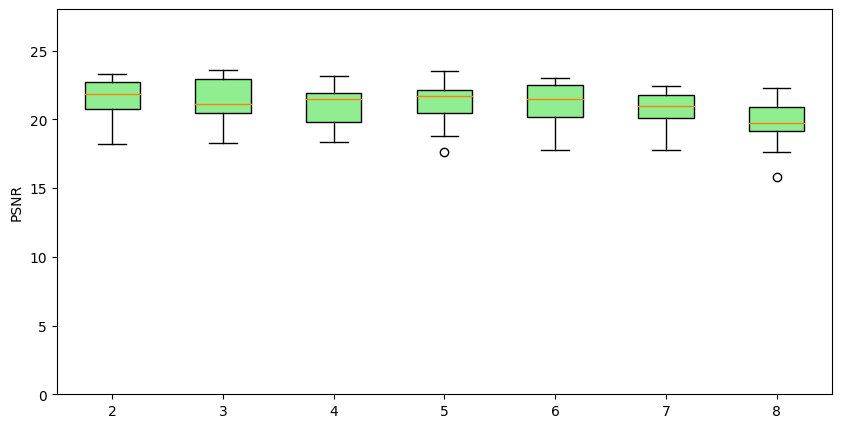

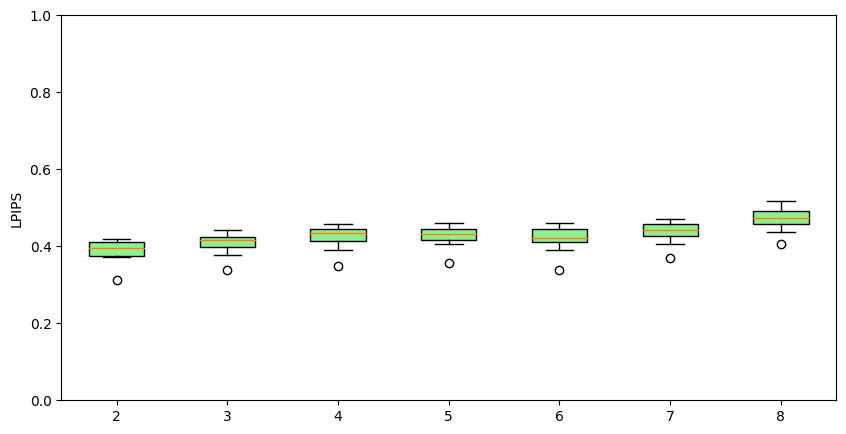

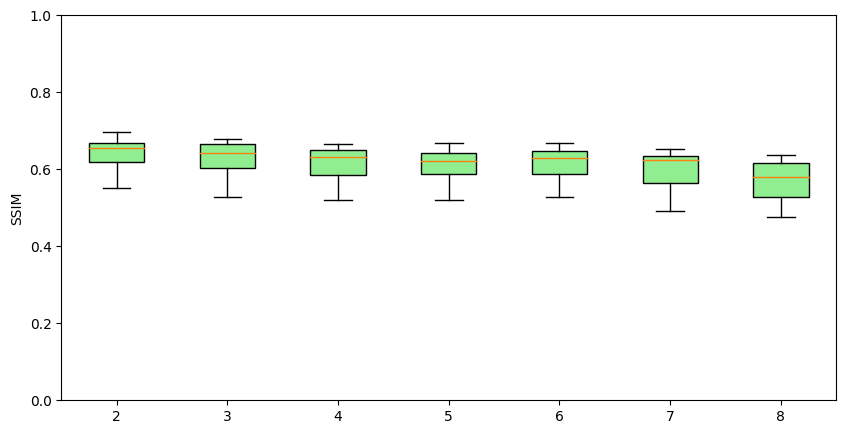

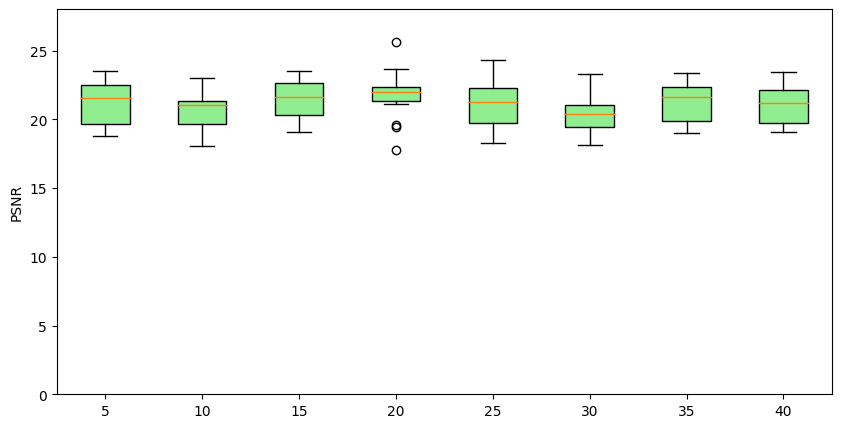

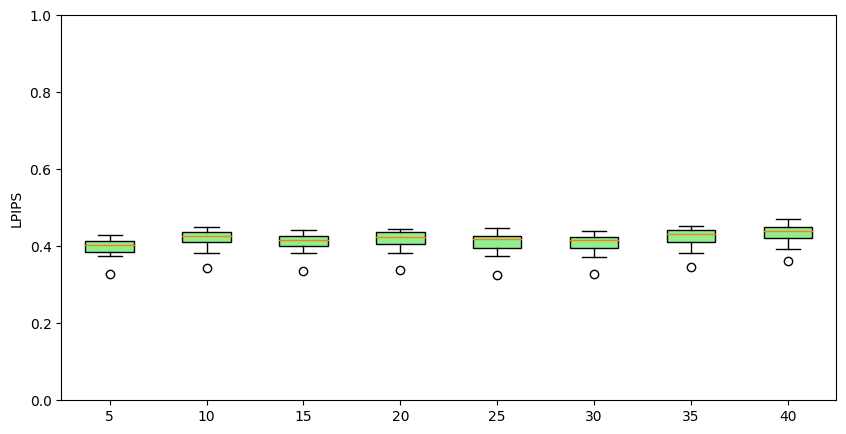

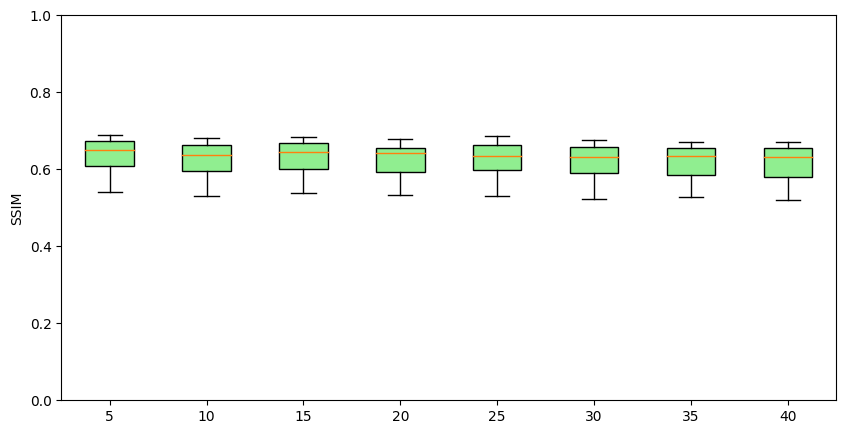

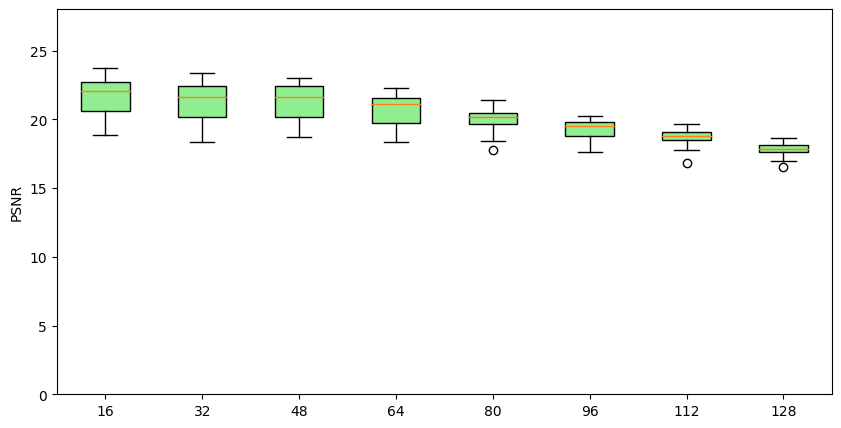

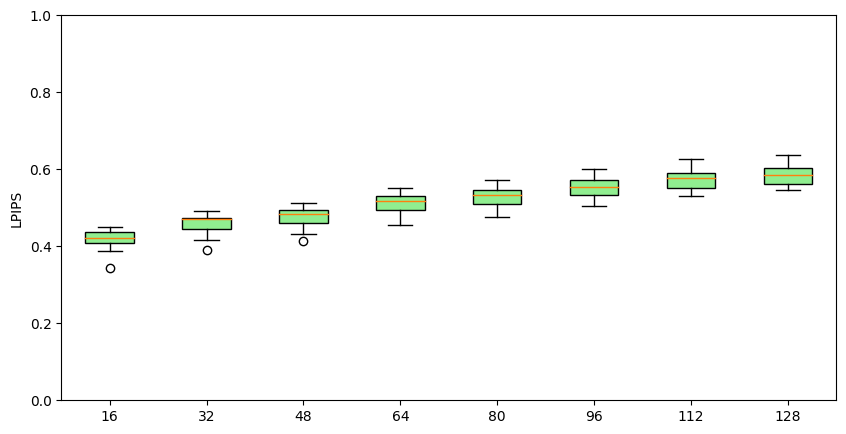

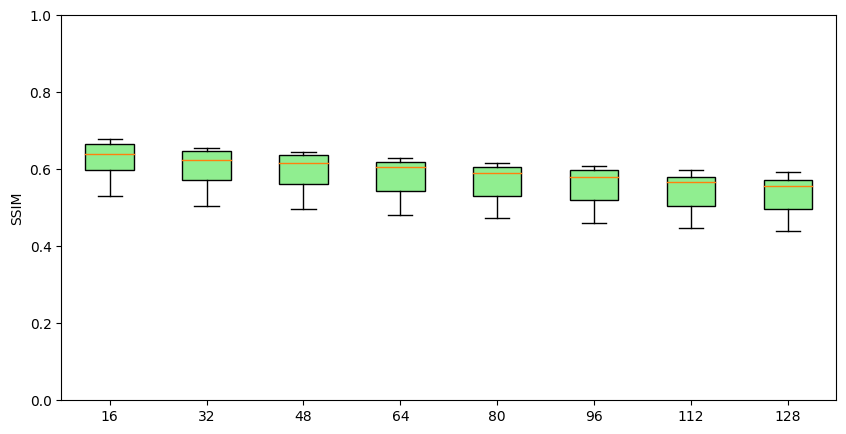

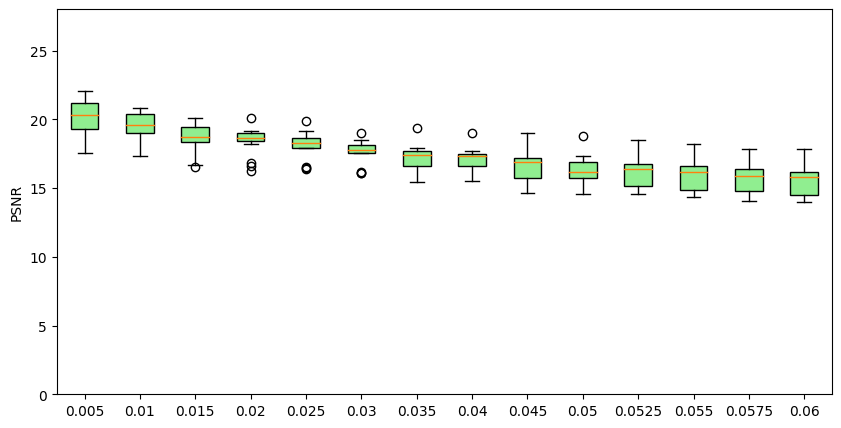

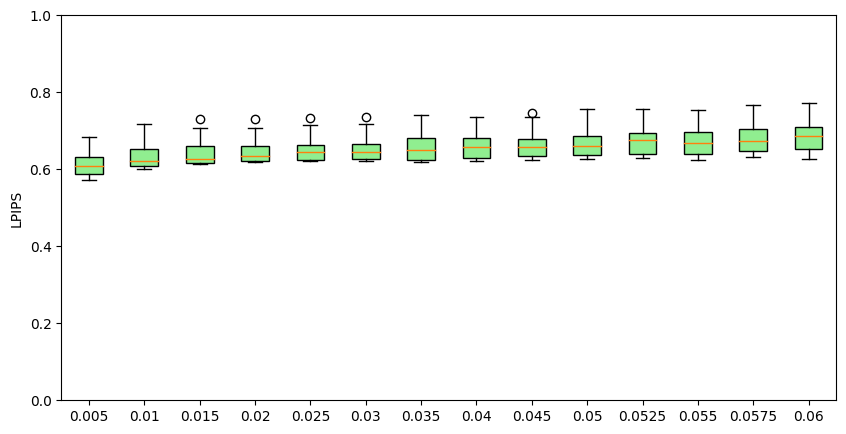

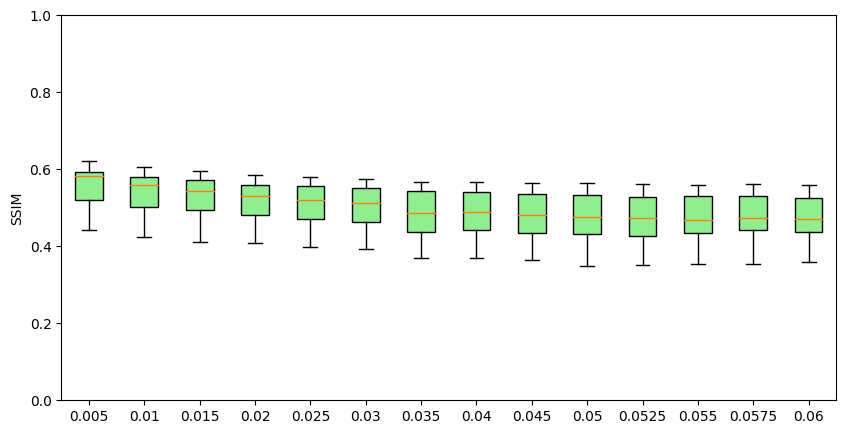

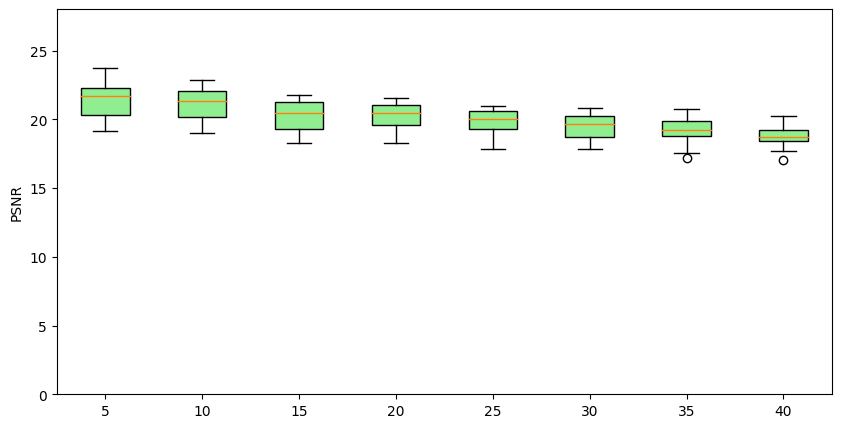

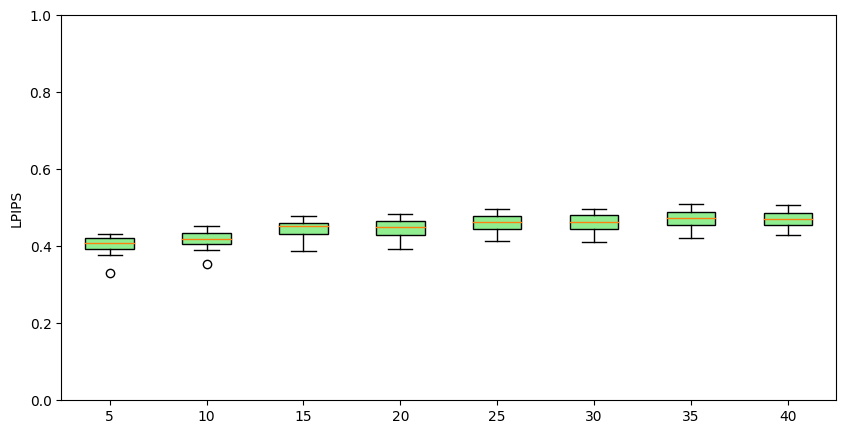

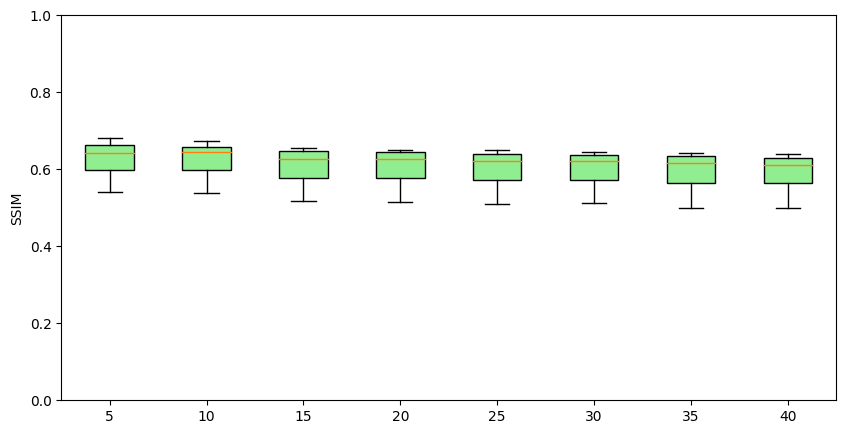

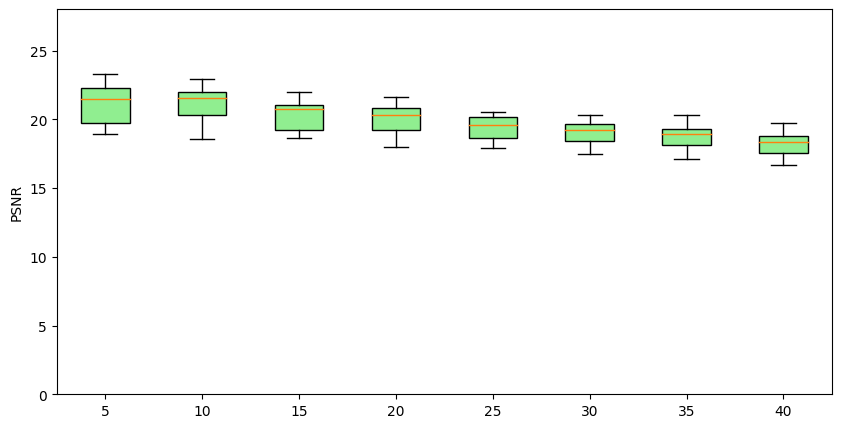

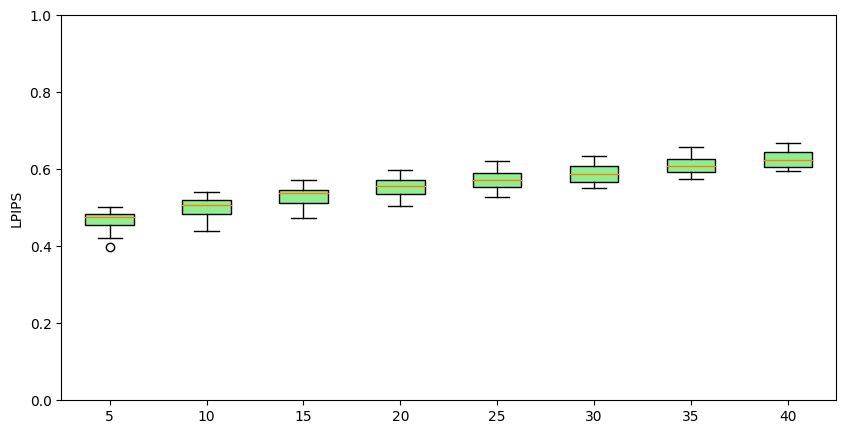

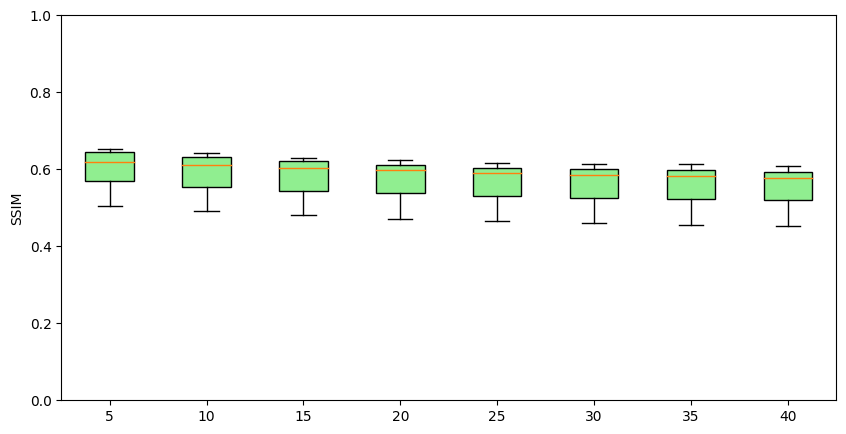

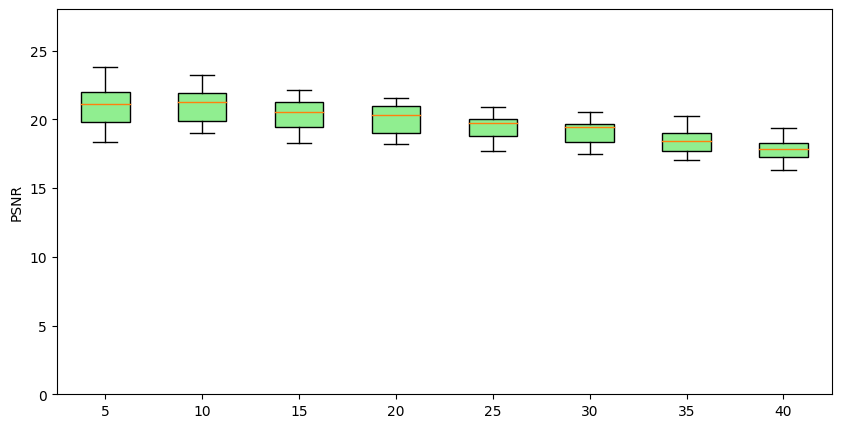

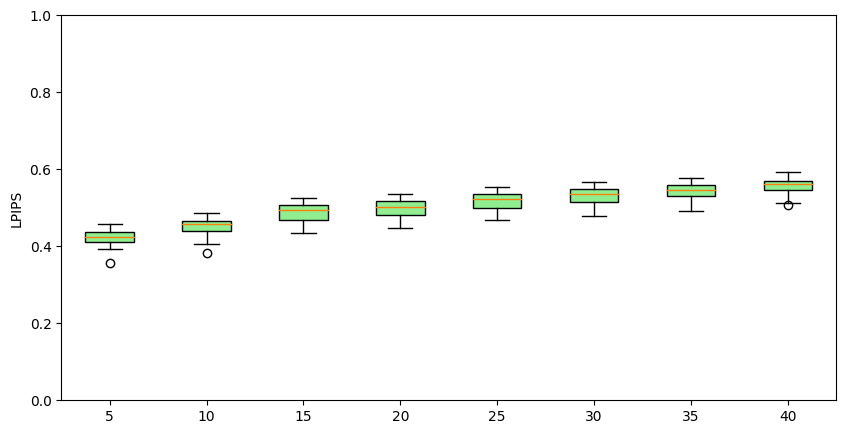

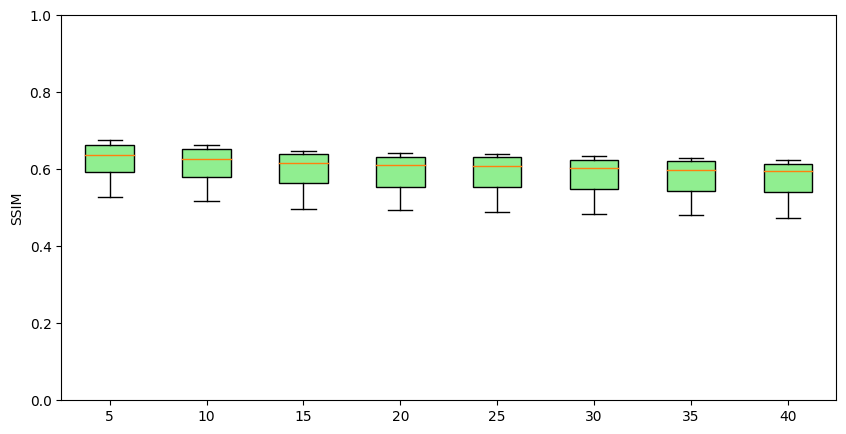

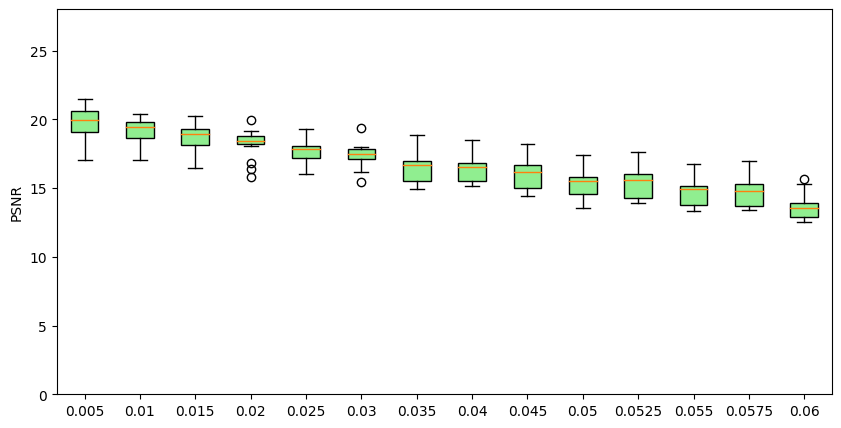

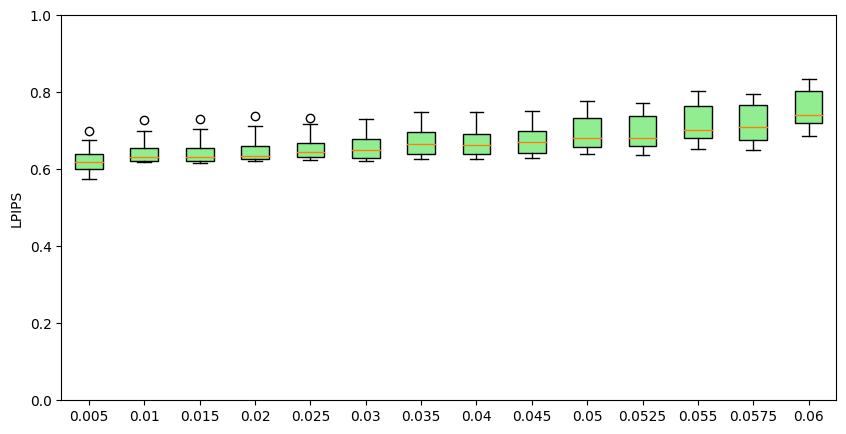

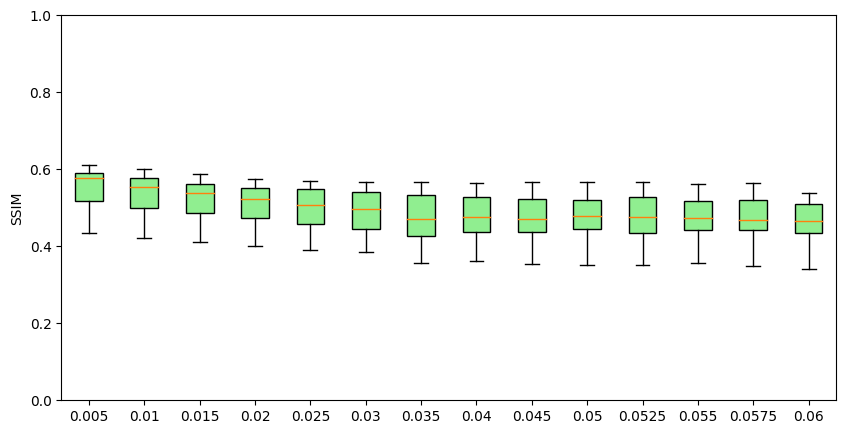

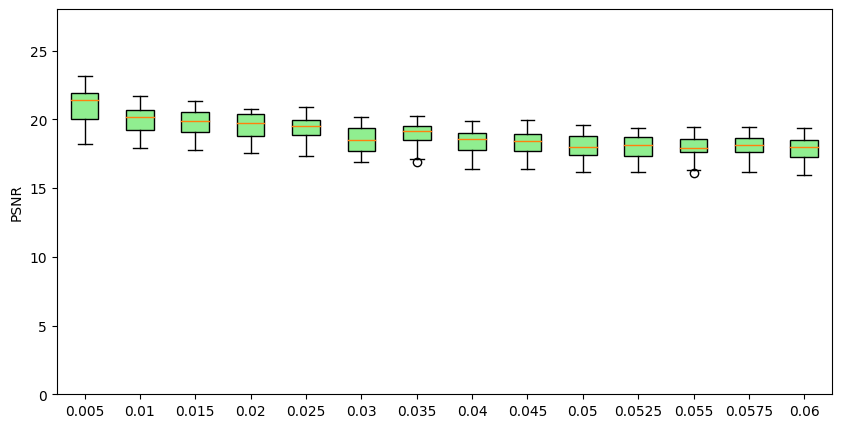

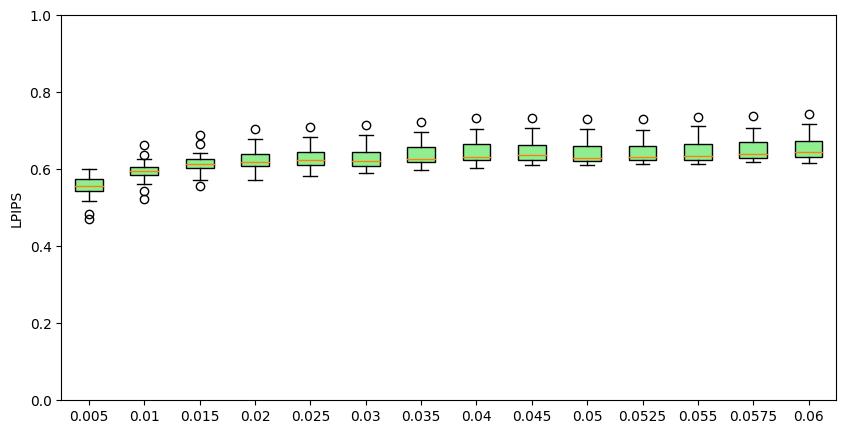

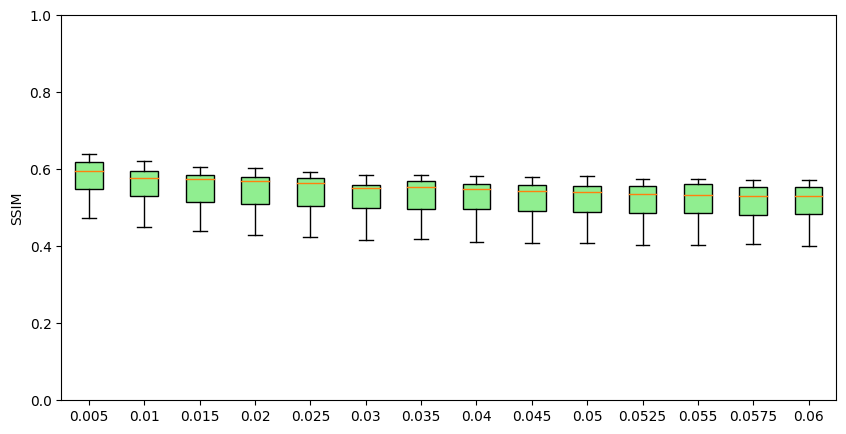

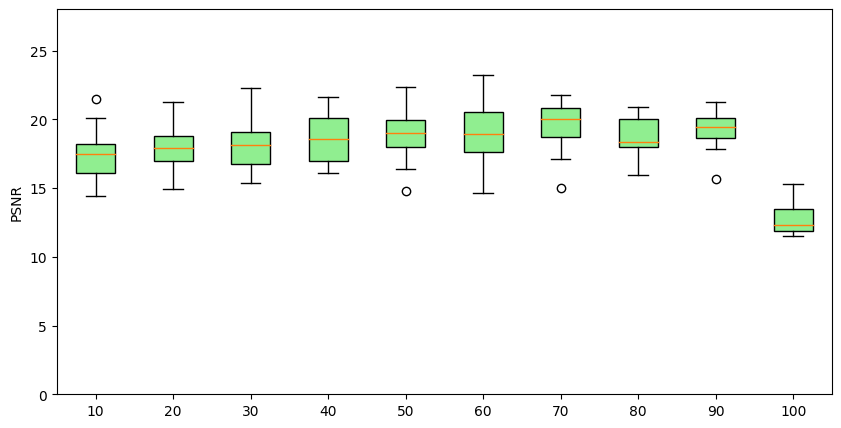

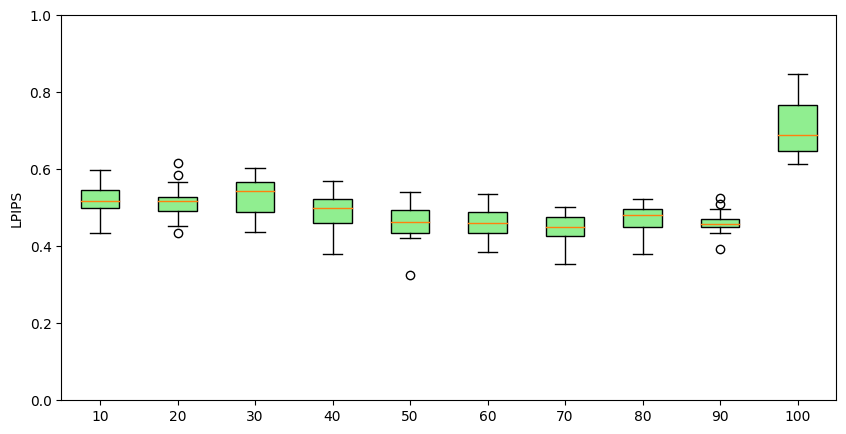

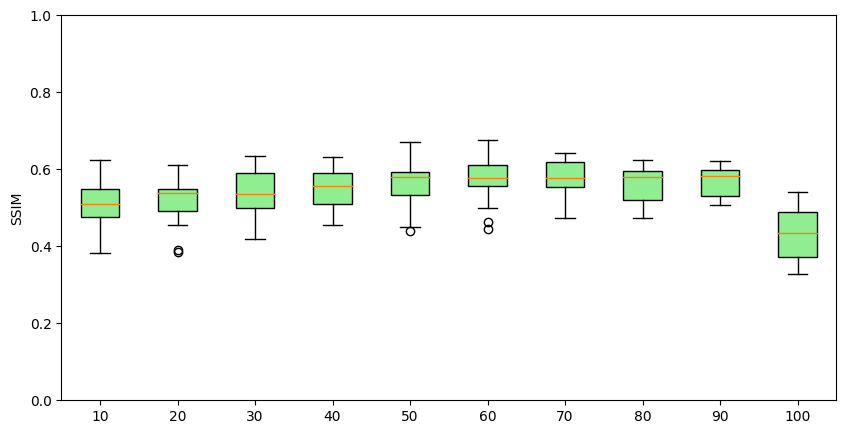

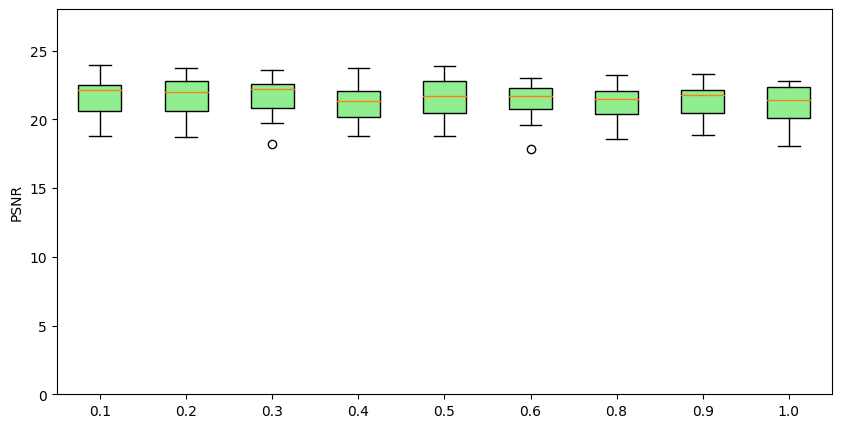

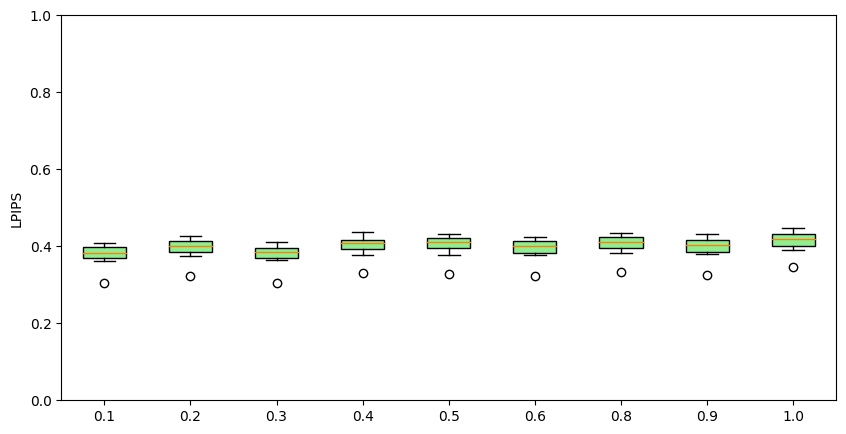

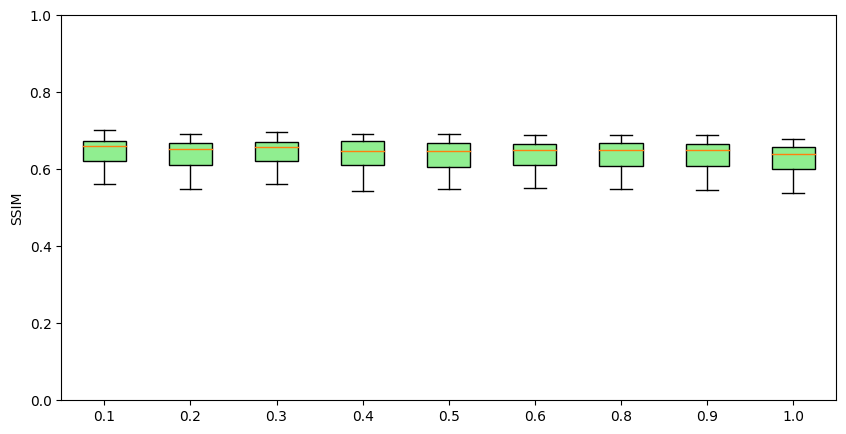

In [105]:
import os
save_dir = r'C:\Stuff\Results\plots\stump_ngp_opt_on'
config_name = os.path.basename(save_dir)

for type, metrics in types_dict.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]     
    
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]

        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        print(exp_name_joined)
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    
    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_psnrs, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 28)  # Set y-axis limits
    plt.ylabel('PSNR')
    plt.savefig(os.path.join(save_dir, f'{config_name}_PSNR_{exp_name_joined}.png'), dpi=300)
    

    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_lpips, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 1)  # Set y-axis limits
    plt.ylabel('LPIPS')
    plt.savefig(os.path.join(save_dir, f'{config_name}_LPIPS_{exp_name_joined}.png'), dpi=300)

    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_ssims, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 1)  # Set y-axis limits
    plt.ylabel('SSIM')
    plt.savefig(os.path.join(save_dir, f'{config_name}_SSIM_{exp_name_joined}.png'), dpi=300)    
    

In [113]:
import os

def generate_latex_for_images(directory):
    # List all files in the provided directory
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # LaTeX document header
    latex_document = r"""\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
"""
    
    # Generate LaTeX code for each image file
    for image in image_files:
        # Escape underscores for LaTeX
        image_caption = image.replace('_', r'\_')
        # Build LaTeX figure code
        latex_figure = r"\begin{figure}[h]" + "\n" + \
                       r"\centering" + "\n" + \
                       r"\includegraphics[width=\linewidth]{images/plots_20.03.2024/" + image + "}" + "\n" + \
                       r"\caption{" + image_caption + "}" + "\n" + \
                       r"\end{figure}" + "\n\n"
        latex_document += latex_figure
    
    # LaTeX document footer
    latex_document += r"\end{document}"
    
    return latex_document

# The directory containing the images
image_directory = r'C:\Stuff\Results\plots\stump_ngp_opt_off'  # Replace with your actual directory path

# Generate the LaTeX document
latex_code = generate_latex_for_images(image_directory)

# Print the generated LaTeX code
print(latex_code)


\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
\begin{figure}[h]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_off_LPIPS_benchmark.png}
\caption{stump\_ngp\_opt\_off\_LPIPS\_benchmark.png}
\end{figure}

\begin{figure}[h]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_off_LPIPS_stump-every.png}
\caption{stump\_ngp\_opt\_off\_LPIPS\_stump-every.png}
\end{figure}

\begin{figure}[h]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_off_LPIPS_stump-gamma.png}
\caption{stump\_ngp\_opt\_off\_LPIPS\_stump-gamma.png}
\end{figure}

\begin{figure}[h]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_off_LPIPS_stump-noise-std.png}
\caption{stump\_ngp\_opt\_off\_LPIPS\_stump-noise-std.png}
\end{figure}

\begin{figure}[h]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_off_LPIPS_stump-or